In [1]:
# Import necessary libraries for machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df_ml = pd.read_csv('breast_cancer_ready_for_ml.csv')

# Define Features (X) and Target (y)
X = df_ml.drop('Sample_Type', axis=1)
y = df_ml['Sample_Type']

# Split the data into Training (80%) and Testing (20%) sets
# 'stratify=y' ensures that the ratio of 0s and 1s remains the same in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data split successful!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Data split successful!
Training set: 1534 samples
Testing set: 384 samples


In [2]:
# Initialize the model
# n_estimators=100 means we use 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


In [3]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Display the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

# Display the Classification Report
# Note: 0 = Metastasis, 1 = Primary
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Metastasis (0)', 'Primary (1)']))

# Calculate ROC-AUC Score
y_prob = rf_model.predict_proba(X_test)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

Overall Accuracy: 0.99

--- Classification Report ---
                precision    recall  f1-score   support

Metastasis (0)       1.00      0.98      0.99       184
   Primary (1)       0.98      1.00      0.99       200

      accuracy                           0.99       384
     macro avg       0.99      0.99      0.99       384
  weighted avg       0.99      0.99      0.99       384

ROC-AUC Score: 1.00


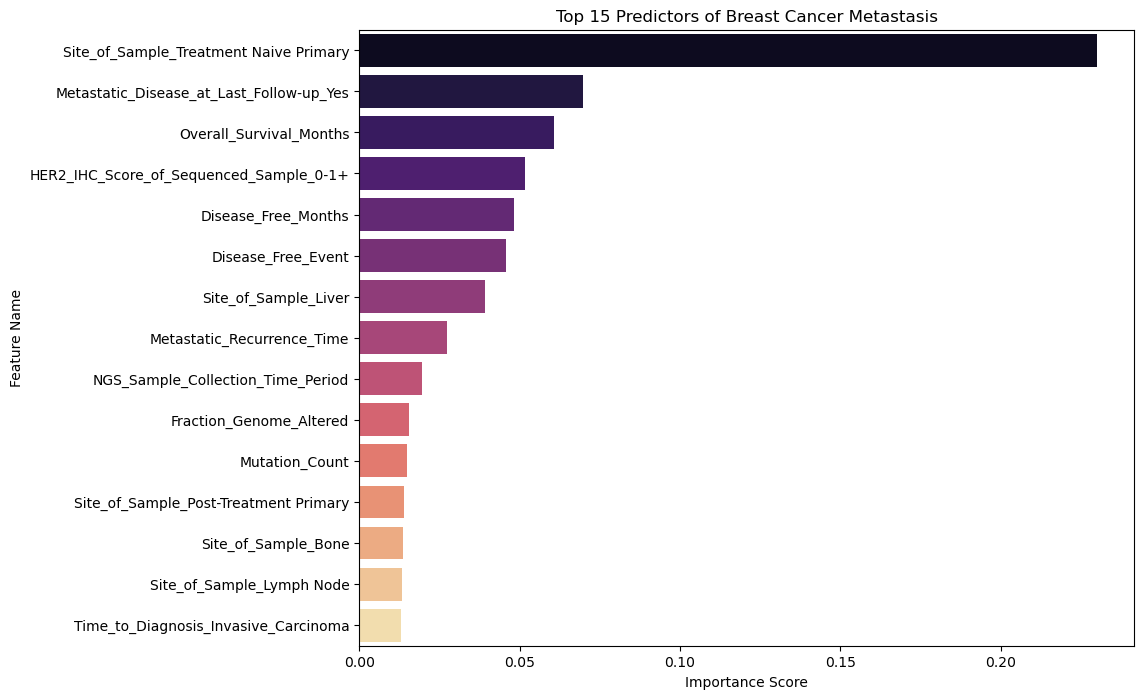

In [4]:
# Extract feature importance from the model
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and take the top 15 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Visualize the top features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, hue='Feature', palette='magma', legend=False)
plt.title('Top 15 Predictors of Breast Cancer Metastasis')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

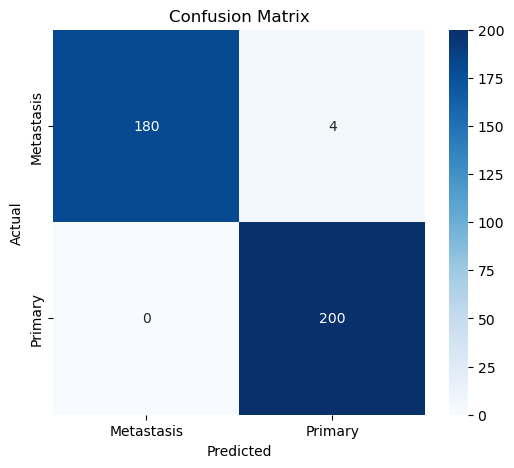

In [5]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Metastasis', 'Primary'], yticklabels=['Metastasis', 'Primary'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()